In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
diamonds = pd.read_csv(r"..\dataset\diamonds.csv")

The x,y and z values in this dataset stand for length, width and depth in milimeters

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I do expect there to be a correlation between the cut and the color of a diamond, because I would expect more effort to be put into cutting the diamonds of preferable color, meaning their cut is of a better quality.

In [6]:
contingencyTableColor = diamonds.groupby(['cut','color']).size().unstack('cut', fill_value=0)
contingencyTableColor

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,163,662,2834,1603,1513
E,224,933,3903,2337,2400
F,312,909,3826,2331,2164
G,314,871,4884,2924,2299
H,303,702,3115,2360,1824
I,175,522,2093,1428,1204
J,119,307,896,808,678


Most diamonds are cut "Ideal" while the least cut is "Fair"

<AxesSubplot:xlabel='color'>

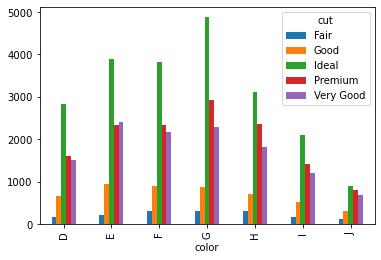

In [7]:
contingencyTableColor.plot(kind='bar')

Here you can see better that there are many more diamonds cut "Ideal" than there are cut "Fair"


In [8]:
chi2_contingency(contingencyTableColor)

(310.31790052115423,
 1.3945120919851853e-51,
 24,
 array([[ 202.22005933,  616.2059696 , 2706.85993697, 1732.18437152,
         1517.52966259],
        [ 292.42065258,  891.06566555, 3914.25930664, 2504.82808676,
         2194.42628847],
        [ 284.80941787,  867.87267334, 3812.37749351, 2439.63147942,
         2137.30893585],
        [ 337.04338154, 1027.04026696, 4511.56640712, 2887.05917686,
         2529.29076752],
        [ 247.85761958,  755.27296997, 3317.7512792 , 2123.1083426 ,
         1860.00978865],
        [ 161.83574342,  493.1466815 , 2166.28702262, 1386.25884316,
         1214.47170931],
        [  83.8131257 ,  255.39577308, 1121.89855395,  717.92969967,
          628.96284761]]))

Since the outcome of the chi2 test is 1.3945120919851853e-51 there is a 1.3945120919851853e-49% chance that there is not a correlation between sex and species. This is lower than a 5% chance and this means there is a correlation between cut and color.